# Introduction to Stim Lab

This lab provides you with an outline of the steps requested by the "Introduction to Stim" assignment and a way to verify your answers' correctness. By the end, you'll have: 

1. Created and edited circuits in Stim
2. Simulated repetition codes for different distances and physical error rates
3. Estimated the required distance for a memory experiment to survive a trillion rounds with a given physical error rate. 

We challenge you to solve these problems yourself! You'll learn a lot about Stim. 

## Setup: Open the Introduction to Stim Lab 

Congrats! You're in the right place.

First, as mentioned in Lecture Video 7, take a look at the [Stim Getting Started Notebook](https://github.com/quantumlib/Stim/blob/main/doc/getting_started.ipynb). 

This notebook pulls the components critical for the assignment from the Getting Started notebook, which includes much more context and detail. If you get stuck at any point in this lab, it may be useful to go back and reference it. 

Second, consider the files available in this lab's root directory: 
- `Introduction to Stim Lab.ipynb` - this file!
- `rc_d3_lecture_07.stim` - a stim/text file to paste the code into from Lecture Video 7
- `rep_code.py` - a python file that defines the `create_rep_code_stim_string` function that you'll write.
- `getting_started.py` - a copy of the Stim Getting Started notebook. You're free to use that file for the assignment if you'd prefer less guidance. 
- `dont_look` - a directory defining functions you can use to check your answers. Honor system: Don't look at the stuff in here unless you get completely stuck.

Make sure you can access and edit the first four files above, and move on to Part 1. 

## Part 1: Assemble the Stim file. 

Let's write a Stim circuit! 
1. Return to the `rc_d3_lecture_07.stim` file in the Lab environment and open it for editing. You can return to the root directory by clicking on the folder/directory icon in the top bar of this Coursera environment, typing '/tree' into the bar, and clicking "Go".
2. Copy the code presented in Lecture Video 7 into the file, in order of appearance in the lecture.
3. Save the file and return here. 

Next, let's see the results. This will let you see if you happened to miss or duplicate any instructions. 

The following cell imports `stim`, and your circuit from the file. 

In [1]:
%pip install cairosvg

/bin/bash: /home/ryukijano/miniconda3/envs/cudaq-env/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [cairosvg]
Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip install jupyter-compare-view

/bin/bash: /home/ryukijano/miniconda3/envs/cudaq-env/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [jupyter-compare-view]


In [2]:
import stim
circuit = stim.Circuit.from_file("rc_d3_lecture_07.stim")
circuit = stim.Circuit.from_file('dont_look/correct_part1.stim') #TODO REMOVE IN FINAL VERSION

If you get errors while importing, make sure you copied everything exactly as it's presented in the video. 

After importing, you can take a look at your circuit with the `diagram()` function. A couple different visualization options exist with diagram ([see here](https://github.com/quantumlib/Stim/blob/main/doc/python_api_reference_vDev.md#stim.Circuit.diagram)), but the one we'll be using is `timeline-svg`, which matches the circuit diagrams we've been using in lecture. 

See if you can match the instructions you wrote in the file to the operations in the timeline.

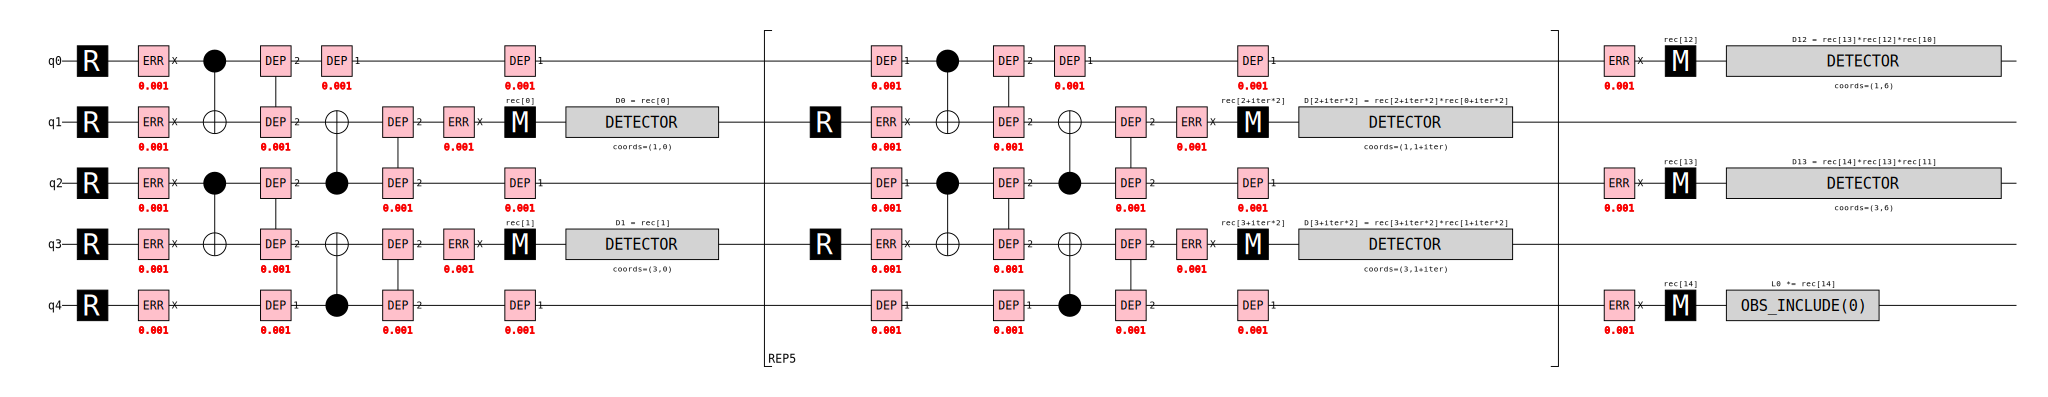

In [3]:
circuit.diagram('timeline-svg')

To let you double-check your implementation, we've provided comparison functions that you can input your circuit to. The result is a comparison image with a slider denoted by the vertical black bar. The image to the left of the bar is your circuit's timeline; the one to the right is a reference implementation's timeline. 

You can click anywhere on the image to move the slider to compare different parts of the image. Note additionally that you can scroll the image left and right with the pop-up scrollbar at the bottom. 

The function will also tell you if your circuit's timeline is pixel-for-pixel identical to the reference one. 

Note that it's possible that your implementation is minorly different, but _equivalent_, in which case the comparison will tell you it isn't pixel-for-pixel identical. This isn't an issue _as long as you understand where and why they differ_ and make sure yourself that they are equivalent implementations. The function does not check equivalence for you. 

Jupyter compare_view v0.2.4
Your circuit's diagram (left) IS identical to the reference one (right).



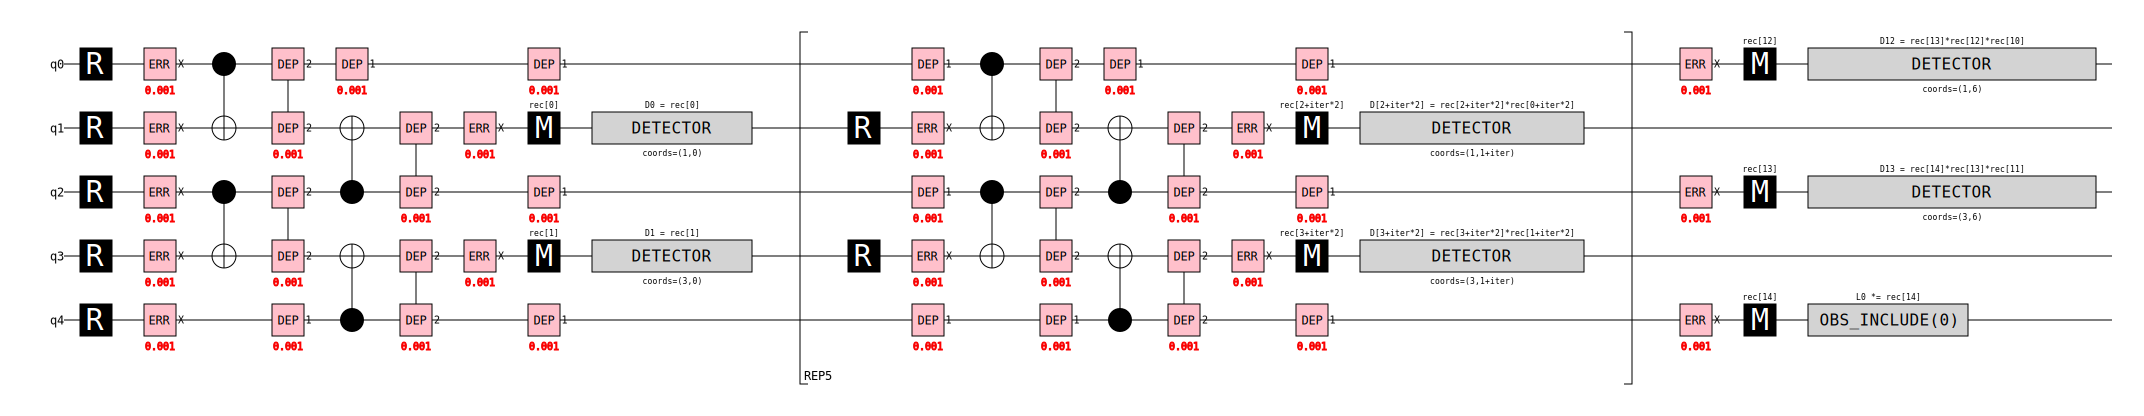
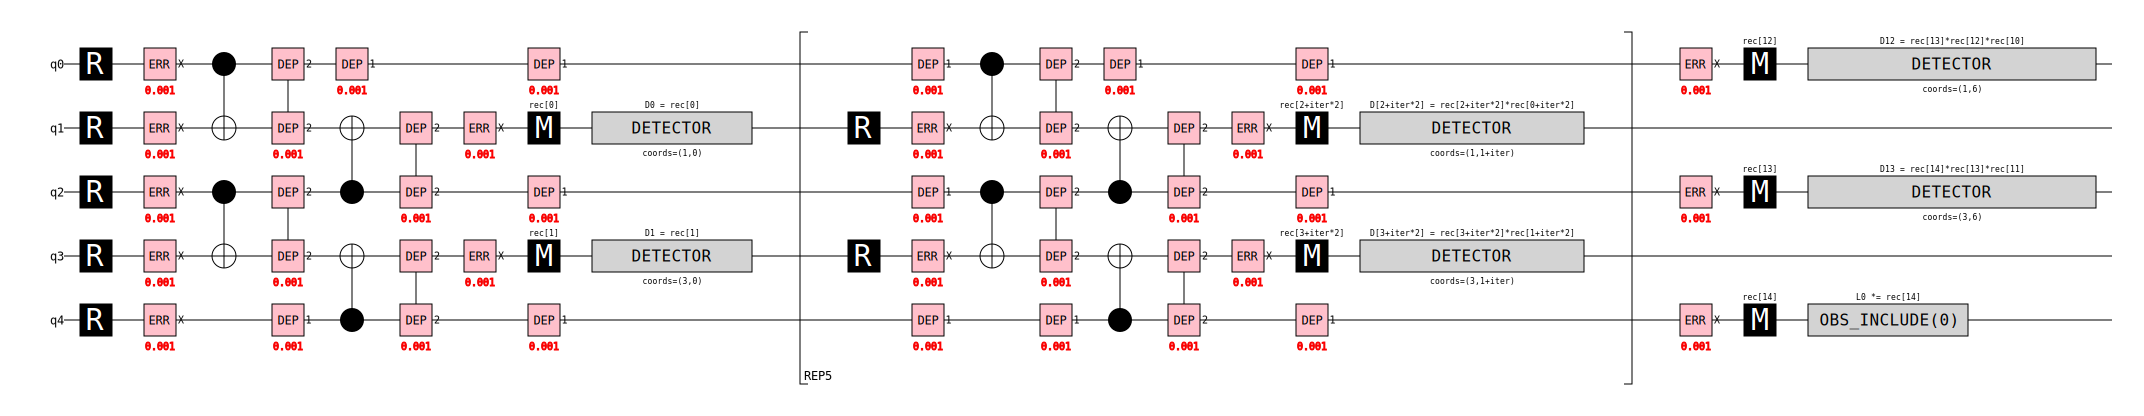

In [6]:
from dont_look.compare_utils import compare_part1, compare_part2, compare_part3, compare_repcode
compare_part1(circuit)

Ensure that your circuit's diagram is identical or at least equivalent to that of the reference circuit. If it is, great job! You've completed Part 1 and can mark that you have in the assignment.

## Part 2: Add TICKs

Update your `rc_d3_lecture_07.stim` file to add `TICK` instructions in sensible places. 

The circuit noise model being implemented here dictates that, in every time step, every qubit will have a noise operation on it, with the type of noise operation depending on the gate being executed in that time step. 

Use the TICK instructions you add to separate the circuit into individual time steps. Each qubit should have exactly one noise and up to one gate operation on it in between each TICK. 

With the following cell, re-import the circuit from the updated file and compare it with the reference circuit, which now has braces at the top and bottom, specified by the `TICK` instructions, that denote the time steps. 

Your circuit's diagram (left) IS identical to the reference one (right).



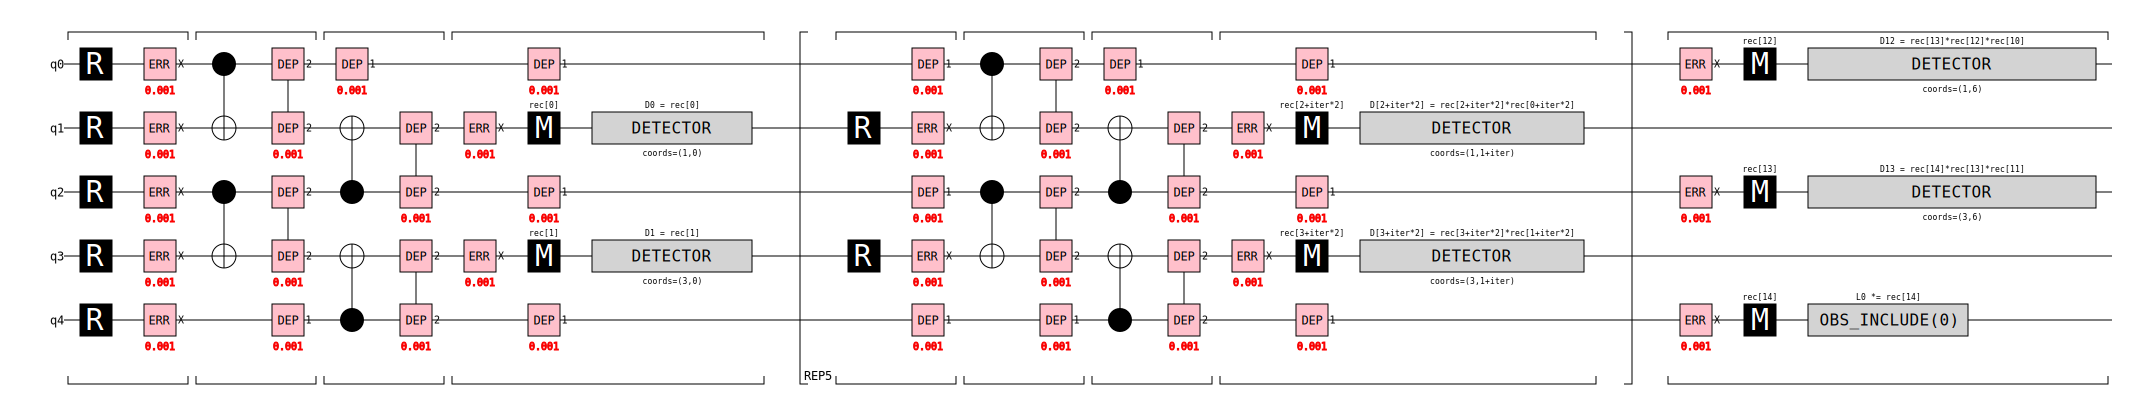
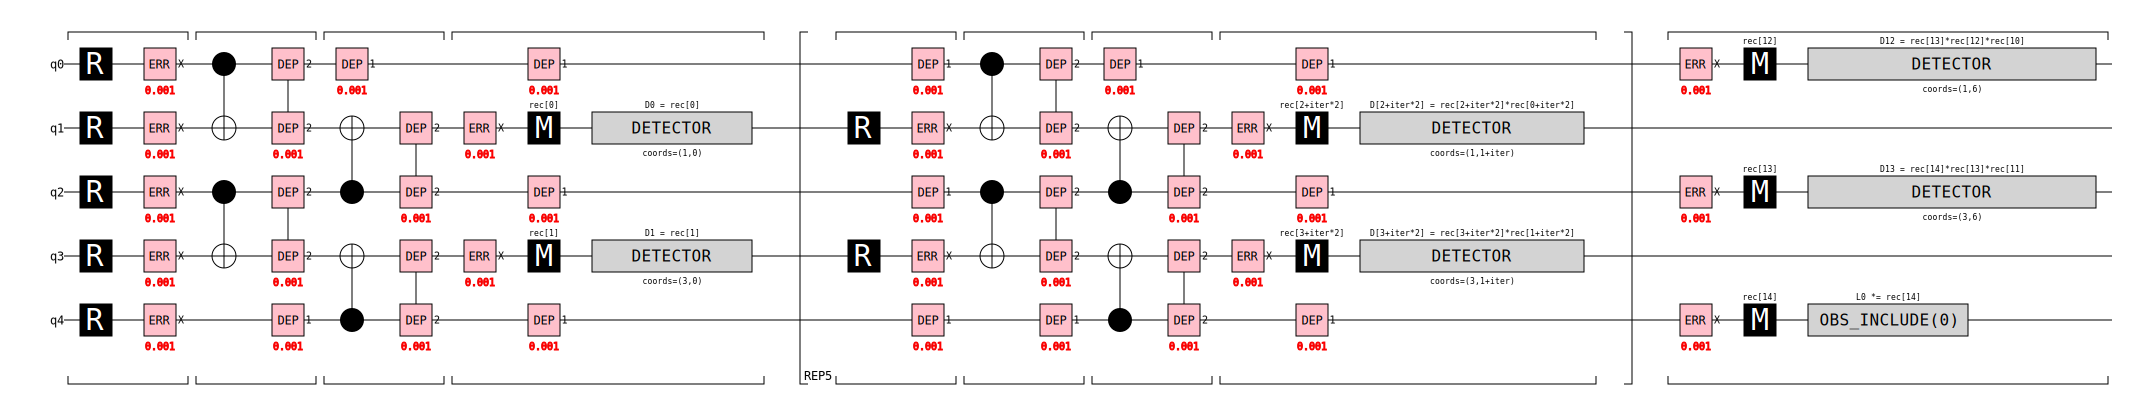

In [7]:
circuit = stim.Circuit.from_file("rc_d3_lecture_07.stim")
circuit = stim.Circuit.from_file('dont_look/correct_part2.stim') #TODO REMOVE IN FINAL VERSION
compare_part2(circuit)

If your circuit's diagram is equivalent to the reference circuit's, you're done with Part 2.

## Part 3: Modify the final round

Copy the contents of your Stim circuit file into the file named `rc_d3_lecture_07_modified.stim` in the same root directory as before. Next, modify the new file so that the final round of measurements occurs at the same time as the second-to-last round of measurements. There is no reason we need to perform these in different time steps, which incurs unnecessary chances for errors.

Ensure that the resulting circuit is equivalent to your original one, except that it now has fewer noise operations at the end, and all of the qubits are measured simultaneously at the end. You may need to make more changes than you expect to achieve this.

Import and diagram your circuit with the following code block.

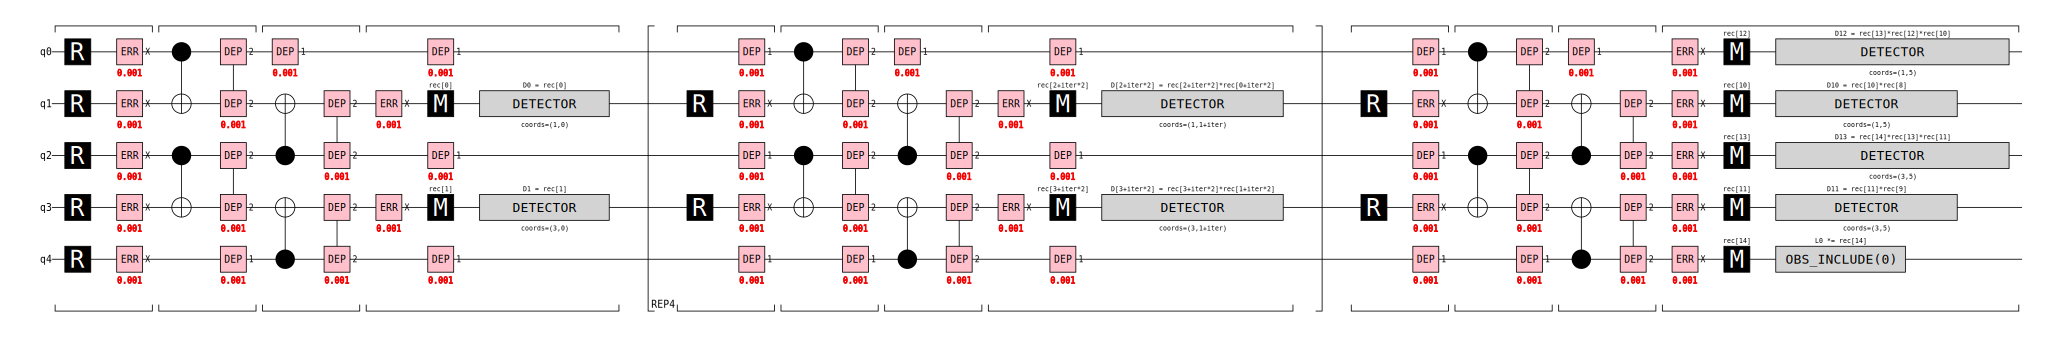

In [8]:
circuit = stim.Circuit.from_file("rc_d3_lecture_07_modified.stim")
circuit = stim.Circuit.from_file('dont_look/correct_part3.stim') #TODO REMOVE IN FINAL VERSION
circuit.diagram('timeline-svg')

And compare it against the reference implementation with the provided comparison function. If your circuit is equivalent, you're done with Part 3.

Your circuit's diagram (left) IS identical to the reference one (right).



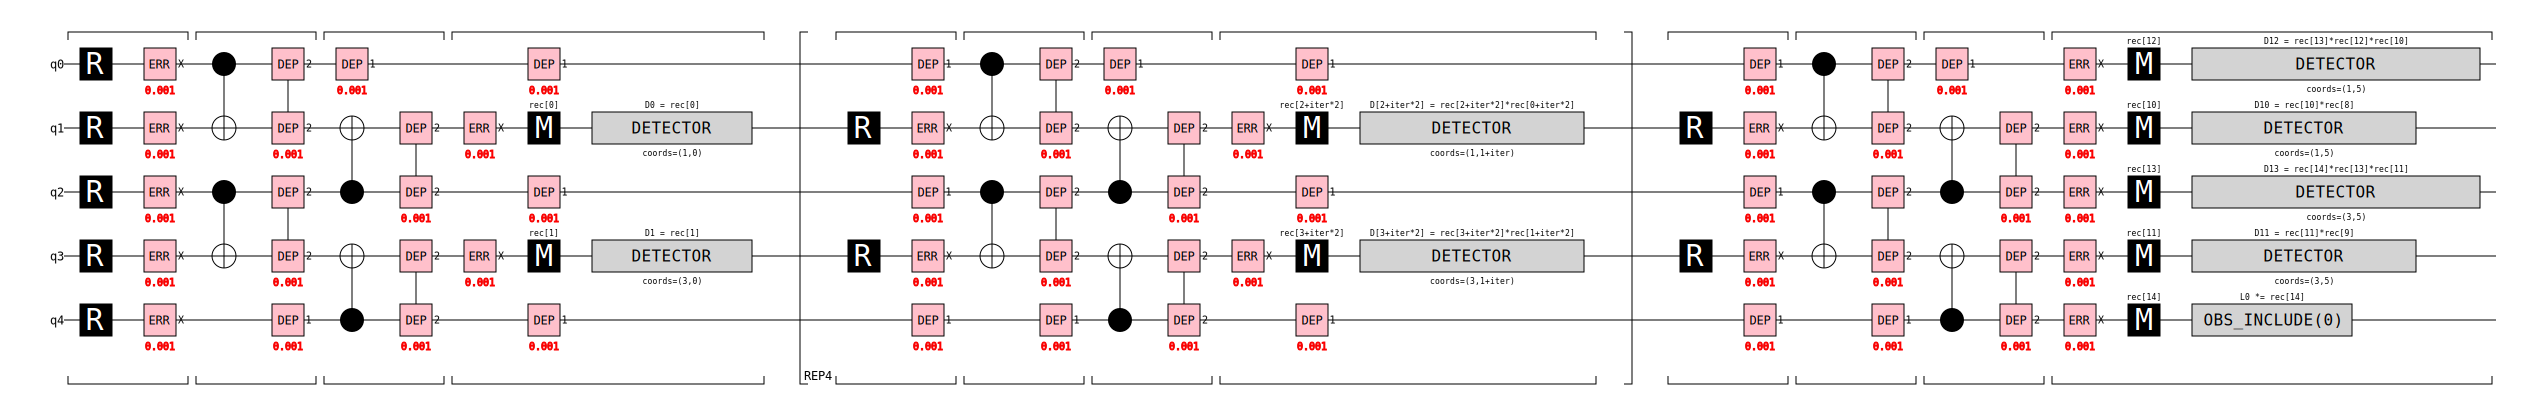
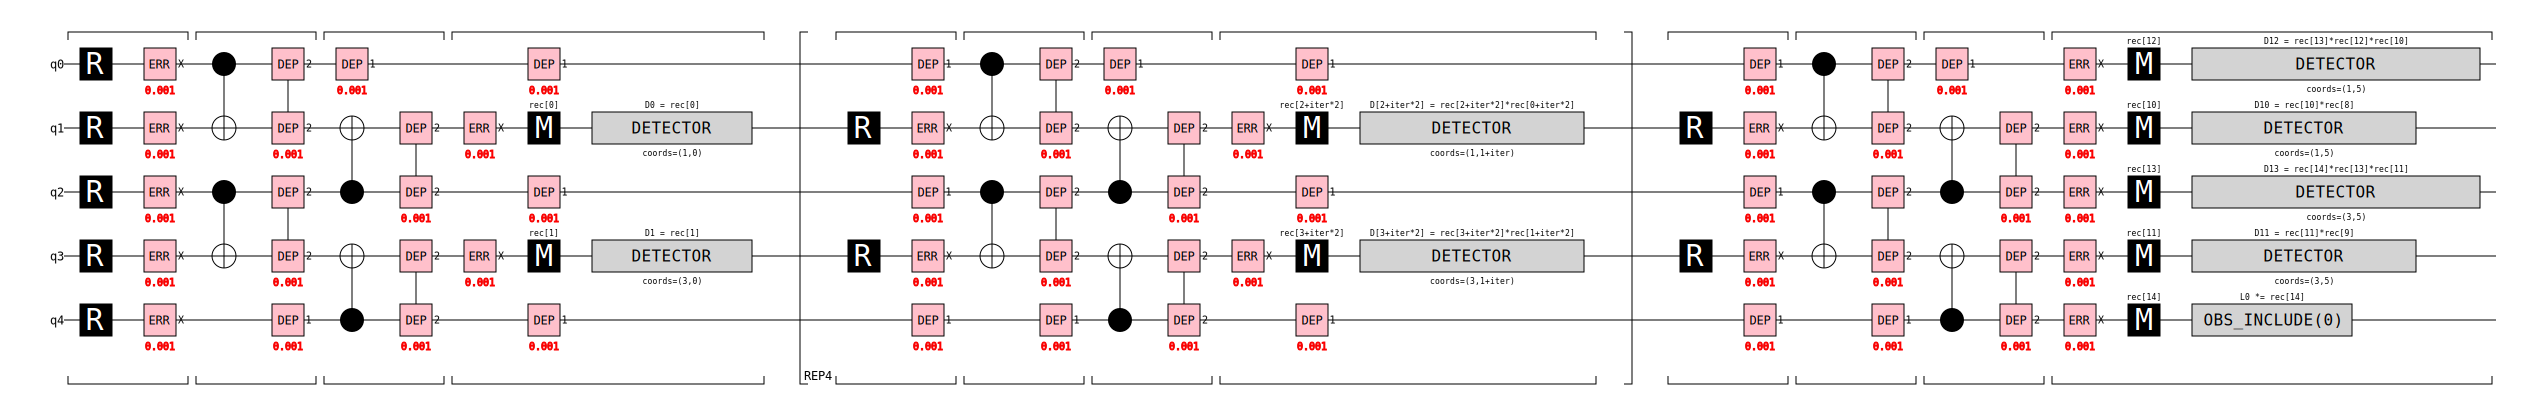

In [9]:
compare_part3(circuit)

## Part 4: Write a repetition code string generator

Next, open up `rep_code.py` in the root directory to find the `create_rep_code_stim_string(distance, rounds, p)` function. Implement this function to create the Stim text string for a repetition code of any code distance, any number of rounds, and any error rate p. It should include circuit-level noise of the same model as the previous circuits. 

There are many ways you can implement this, and it's up to you to pick the style that works for you. For example, one approach could use Python's [Formatted String Literals](https://docs.python.org/3/tutorial/inputoutput.html#formatted-string-literals) to format the output string. 

While developing it, you can return here to run the following cell, which imports your script and calls the function to create a repetition code, and compares it against the reference implementation. Be sure to do this with different values of `distance`, `rounds`, and `p`. 

Your circuit's diagram (left) IS identical to the reference one (right).



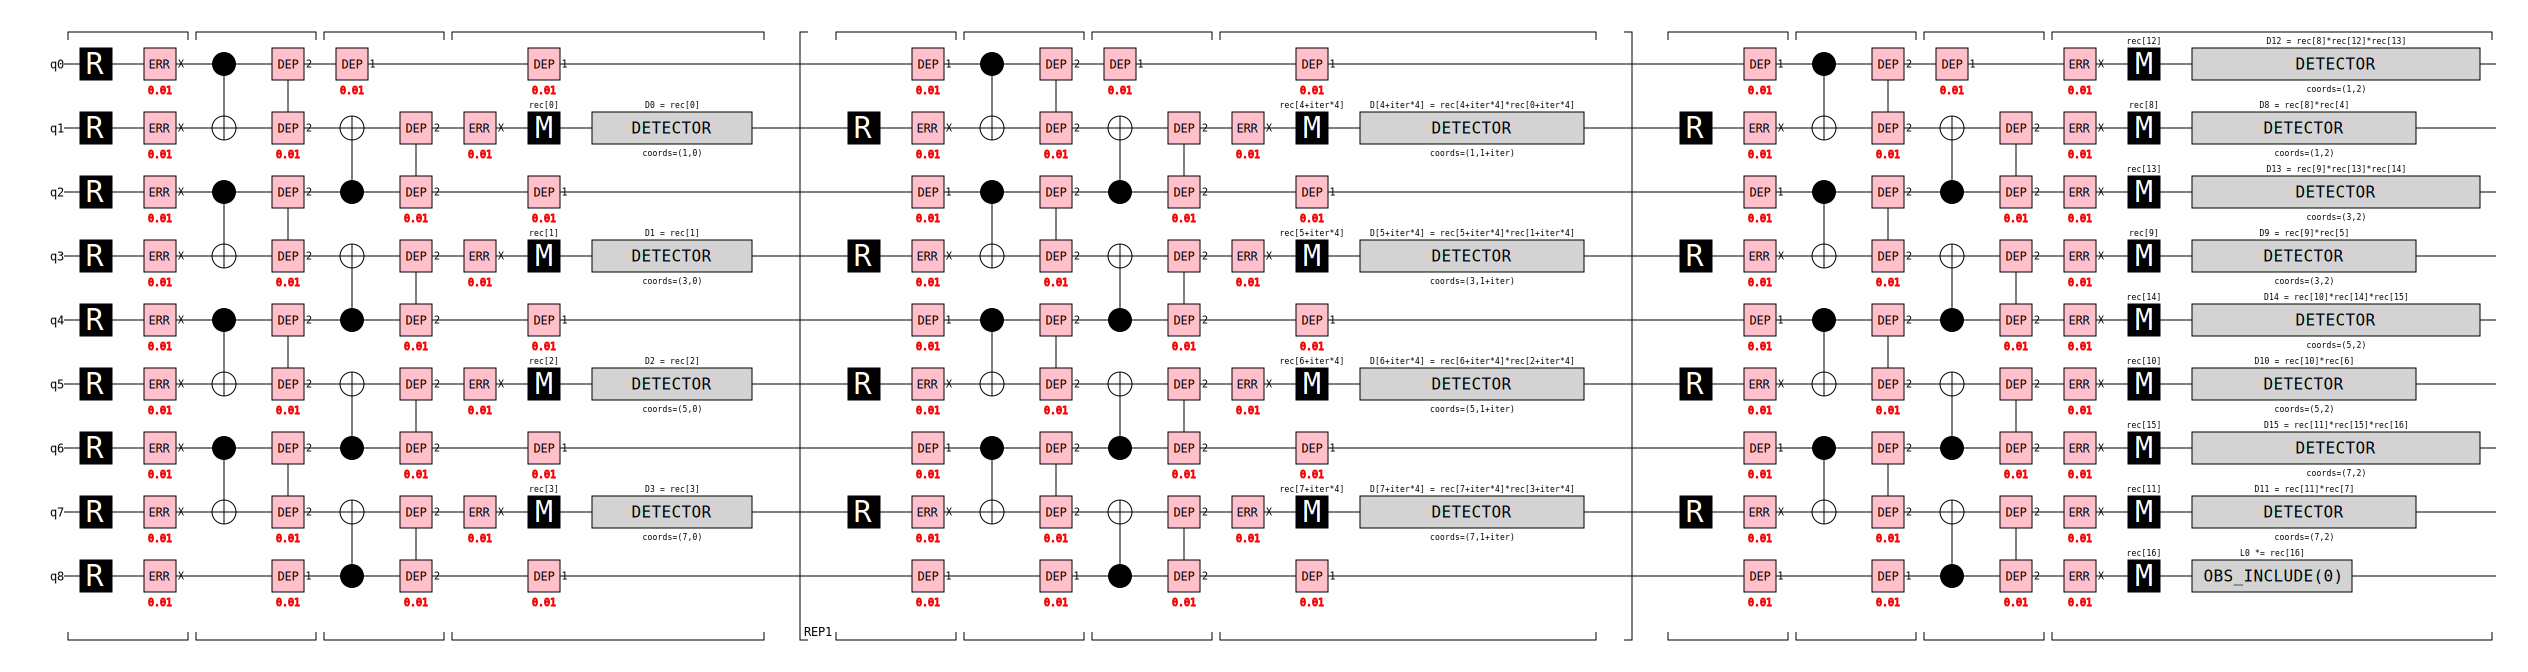
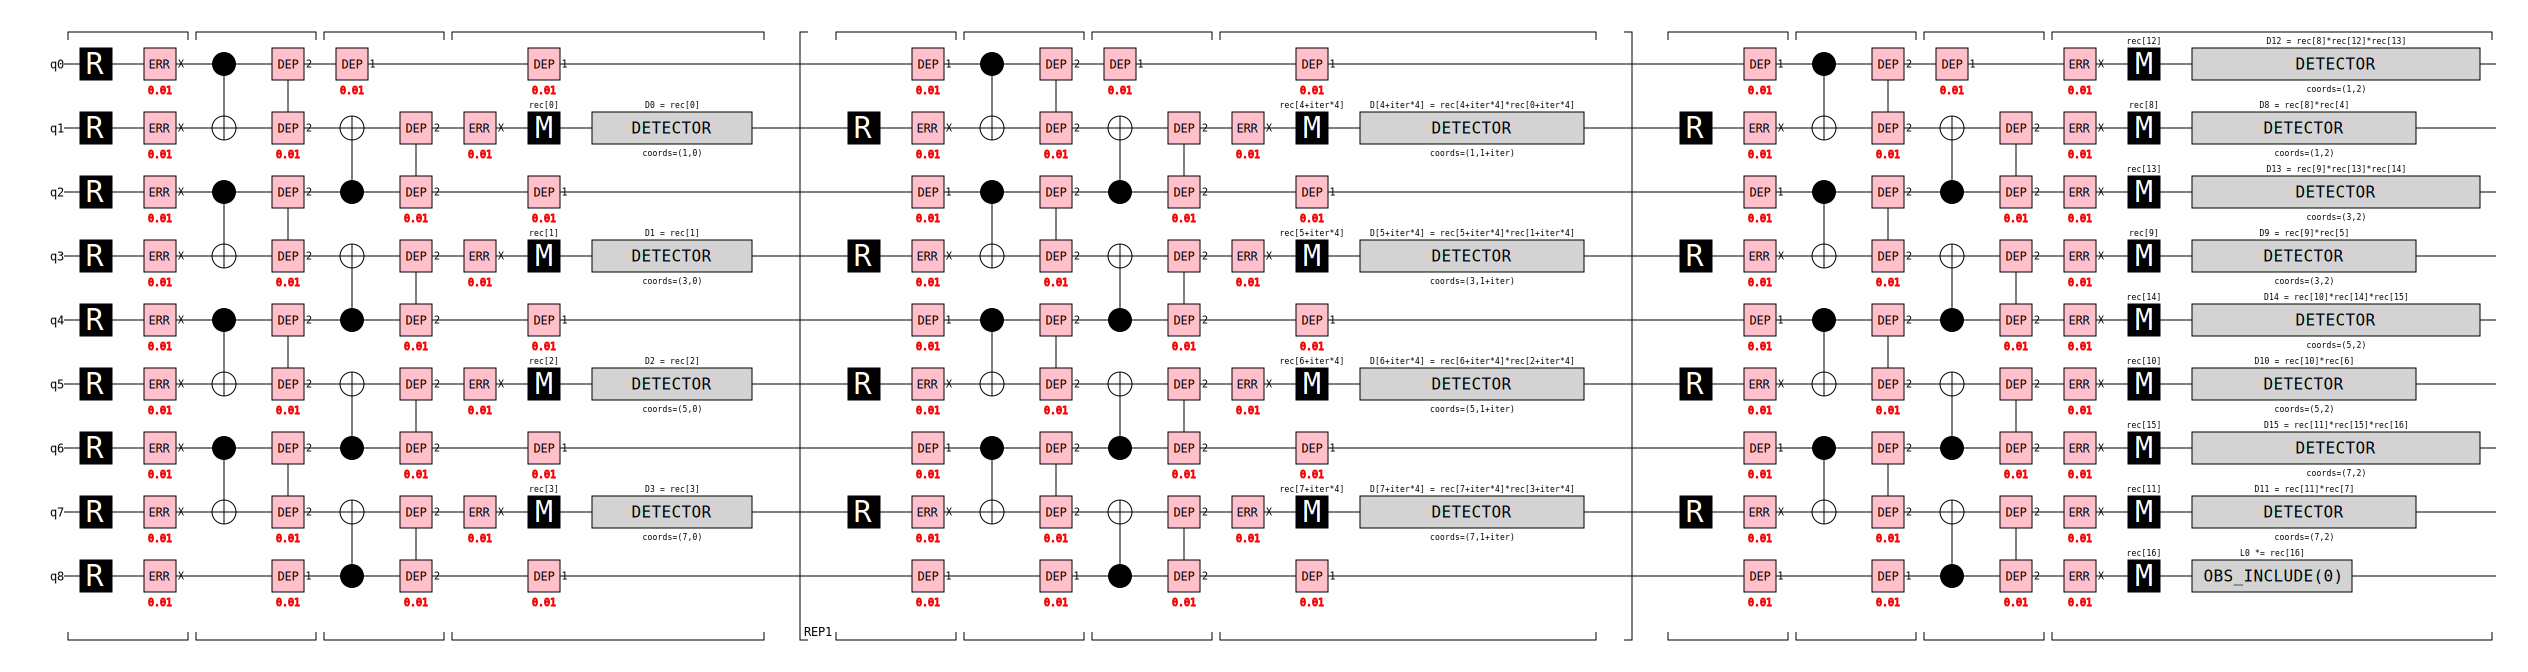

In [10]:
from importlib import reload
import rep_code
import dont_look.correct_rep_code as rep_code # TODO REMOVE IN FINAL VERSION
reload(rep_code) # in case you changed your rep_code.py file between runs of this cell

distance = 5
rounds = 3
p = 0.01
circuit = stim.Circuit(rep_code.create_rep_code_stim_string(distance, rounds, p))
compare_repcode(circuit, distance, rounds, p)

If your function's circuit diagrams are equivalent to those of the reference implementation, you're done with Part 4.

## Part 5: Simulating your circuit with different distances and noise levels

Run the following code in Part 5. It should simulate your circuit implementation at a number of different distances and p values. If your code correctly produces a valid Stim circuit string for all of the listed combinations of input values, these cells should execute without failure. 

The next cell is a code block pulled verbatim from the [Stim Getting Started](https://github.com/quantumlib/Stim/blob/main/doc/getting_started.ipynb) notebook, which:
1. Samples from the detectors of the circuit.
2. Decodes the detectors' results.
3. Counts how many times the decoding predicted that the true logical bit value at the end was one when it was zero, or vice versa.

It is copied here to demonstrate how counting logical errors is done in Stim. You should read [Stim Getting Started](https://github.com/quantumlib/Stim/blob/main/doc/getting_started.ipynb) notebook to understand this in more detail.

In [11]:
import pymatching
import numpy as np
def count_logical_errors(circuit: stim.Circuit, num_shots: int) -> int:
    # Sample the circuit.
    sampler = circuit.compile_detector_sampler()
    detection_events, observable_flips = sampler.sample(num_shots, separate_observables=True)

    # Configure a decoder using the circuit.
    detector_error_model = circuit.detector_error_model(decompose_errors=True)
    matcher = pymatching.Matching.from_detector_error_model(detector_error_model)

    # Run the decoder.
    predictions = matcher.decode_batch(detection_events)

    # Count the mistakes.
    num_errors = 0
    for shot in range(num_shots):
        actual_for_shot = observable_flips[shot]
        predicted_for_shot = predictions[shot]
        if not np.array_equal(actual_for_shot, predicted_for_shot):
            num_errors += 1
    return num_errors

Let's run it with your `circuit`, constructed with `distance=5`, `rounds=3`, and `p=0.01`. It should execute `10,000` shots in milliseconds.

In [12]:
%%time
num_shots = 10_000
errors = count_logical_errors(circuit, num_shots)
errors

CPU times: user 1.6 ms, sys: 13.9 ms, total: 15.5 ms
Wall time: 16.7 ms


15

And compute the logical error rate. It should be around `1.5e-3`.

In [13]:
logical_error_rate = errors/num_shots
logical_error_rate

0.0015

The next cell runs your circuit generation function for different distances `d` and different physical error rates `p`. It then graphs the results with the same graphing strategy used in the getting started notebook. If your circuit generation function is correct, the following should execute without errors.

/tmp/ipykernel_225282/1027076539.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


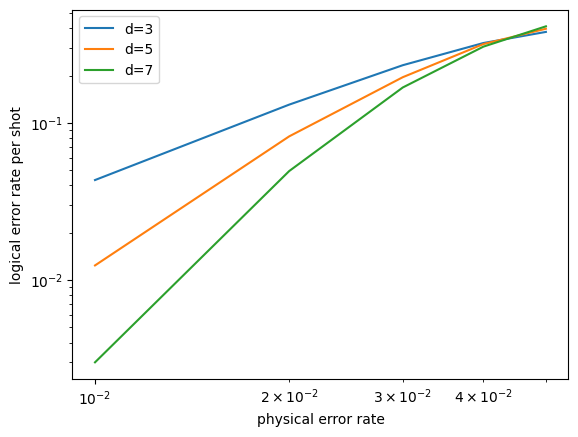

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
num_shots = 10_000
for d in [3, 5, 7]:
    xs = []
    ys = []
    #for p in [0.1, 0.2, 0.3, 0.4, 0.5]: # TODO UNCOMMENT IN FINAL VERSION
    for p in [0.01, 0.02, 0.03, 0.04, 0.05]: # TODO REMOVE IN FINAL VERSION
        circuit = stim.Circuit(rep_code.create_rep_code_stim_string(d, d*3, p)) # create your circuit
        num_errors_sampled = count_logical_errors(circuit, num_shots)
        xs.append(p)
        ys.append(num_errors_sampled / num_shots)
    ax.plot(xs, ys, label="d=" + str(d))
ax.loglog()
ax.set_xlabel("physical error rate")
ax.set_ylabel("logical error rate per shot")
ax.legend()
fig.show()

Use the next code block to compare your diagram to the reference implementation's graph. It shouldn't be the same as your graph at the start. **Figure out what you need to change in the previous block's simulation code such that your graph is similar to the reference graph.** Note that it won't be exactly the same due to random variance during simulation. This should be a relatively small change.

Note that our circuit uses a circuit-level noise model that injects error on every qubit on every time step. This means it will be notably less tolerant to higher error rates than the default Stim implementation of the repetition code, used in the Getting Started notebook where this code was originally from, which uses a less realistic noise model.

Once your graph is close enough to the reference graph that the differences could be reasonably explained by random simulation variance, you're done with Part 5.


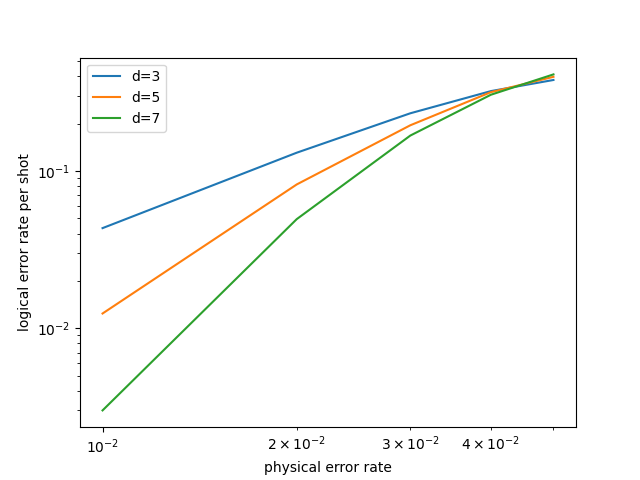
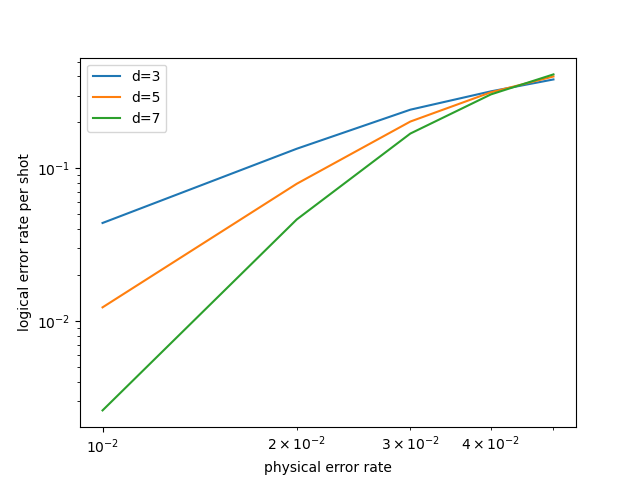

In [15]:
from dont_look.compare_utils import compare_repcode_plot1, compare_repcode_plot2, compare_repcode_plot3
compare_repcode_plot1(fig)

## Part 6: How would you describe what was plotted in the previous question?

Please return to the "Introduction to Stim" assignment and answer question 6, in reference to what you did in Part 5.

## Part 7: Sinter utilities

Just like the getting started notebook's section 8, let's use `sinter`'s utilities to run the same experiment again. This lets you run the experiment faster and provides utilities for nice graphs at the end.

Your goal here is to estimate a physical error rate that induces a factor-of-ten reduction in logical error rate, per increase in the code distance by two. If you implemented the repetition code correctly, this should be around $0.005$.

In [16]:
import sinter
from typing import List

The next cell collects the data, using your circuit instead of the default stim circuit generator. In this cell you'll need to change the noise levels `p` used to simulate your circuits, and may need to change the number of shots executed per circuit.

In [14]:
tasks = [
    sinter.Task(
        circuit = stim.Circuit(rep_code.create_rep_code_stim_string(d, d*3, p)), # create your circuit
        json_metadata={'d': d, 'r': d * 3, 'p': p},
    )
    for d in [3, 5, 7, 9]
    #for p in [0.05, 0.08, 0.1, 0.2, 0.3, 0.4, 0.5] # TODO UNCOMMENT IN FINAL VERSION
    for p in [0.005, 0.008, 0.01, 0.02, 0.03, 0.04, 0.05] # TODO REMOVE IN FINAL VERSION
]

collected_stats: List[sinter.TaskStats] = sinter.collect(
    num_workers=4,
    tasks=tasks,
    decoders=['pymatching'],
    max_shots=100_000,
    max_errors=500,
)

And use `sinter`'s plotting utility. You'll need to change the limits of the graph and the title/labels to match the reference graph. 

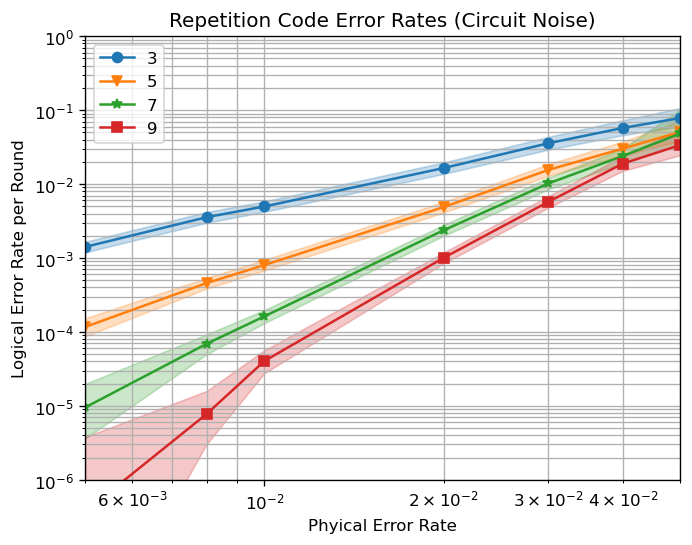

In [15]:
fig, ax = plt.subplots(1, 1)
sinter.plot_error_rate(
    ax=ax,
    stats=collected_stats,
    x_func=lambda stats: stats.json_metadata['p'],
    group_func=lambda stats: stats.json_metadata['d'],
    failure_units_per_shot_func=lambda stat: stat.json_metadata['r'], # added to plot rounds
)
#ax.set_ylim(1e-4, 1e-0) # TODO UNCOMMENT IN FINAL VERSION
#ax.set_xlim(5e-2, 5e-1) # TODO UNCOMMENT IN FINAL VERSION
ax.set_ylim(1e-6, 1e-0) # TODO REMOVE IN FINAL VERSION
ax.set_xlim(5e-3, 5e-2) # TODO REMOVE IN FINAL VERSION
ax.loglog()
#ax.set_title("Repetition Code Error Rates (Phenomenological Noise)") # TODO UNCOMMENT IN FINAL VERSION
ax.set_title("Repetition Code Error Rates (Circuit Noise)") # TODO REMOVE IN FINAL VERSION
ax.set_xlabel("Phyical Error Rate")
#ax.set_ylabel("Logical Error Rate per Shot") # TODO UNCOMMENT IN FINAL VERSION
ax.set_ylabel("Logical Error Rate per Round") # TODO REMOVE IN FINAL VERSION 
ax.grid(which='major')
ax.grid(which='minor')
ax.legend()
fig.set_dpi(120)  # Show it bigger

Use the following figure comparison function to tune the parameters to the `sinter` `Task`s and the figure. Remember, your goal is to estimate the physical error rate that causes an increase in distance by two to decrease the logical error rate by ten. 


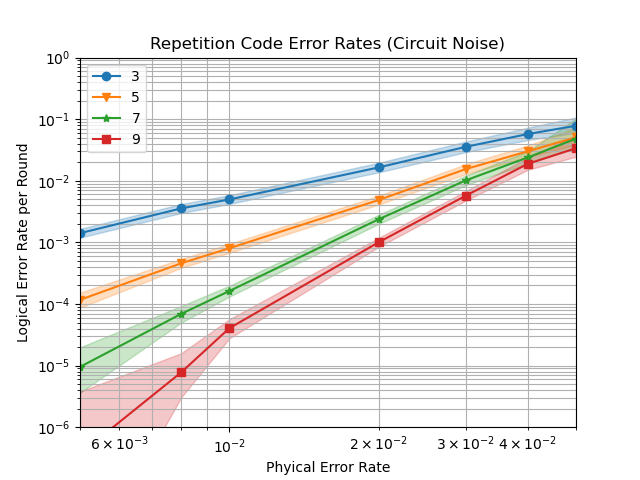
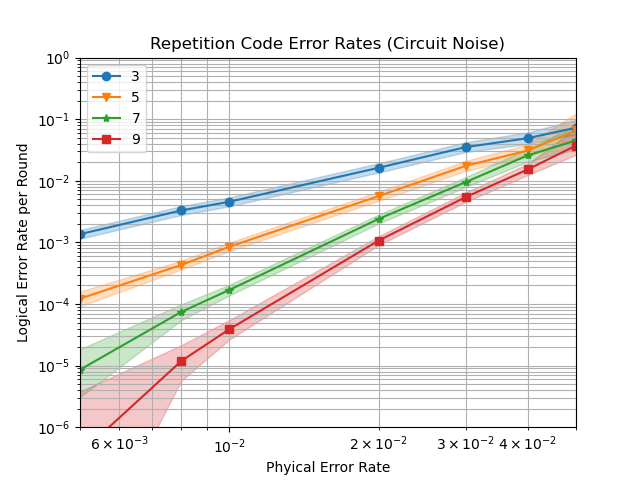

In [16]:
compare_repcode_plot2(fig)

In the previous diagram each of the major gridlines are multiples of ten apart. If you've implemented the code correctly and simulated your circuit at the right error rates, the logical error rates around physical error rate `0.005` should be separated by approximately a multiple of ten. For this error model and code design, this is your threshold!

Once your graph is similar to the reference graph, you're done with Part 7. 

## Part 8: Projecting distance

For a given physical error rate, a fixed (repetition) code architecture and a chosen error model, we now want to use Stim's simulations to estimate how many qubits we would need to reach a certain logical error rate. 

The following code uses a fixed physical error rate, `p=5e-3`, but increases the code distance to create a graph that can be extrapolated to much larger code distances than can be simulated. To a very good approximation, the logical error rate per round decreases exponentially with increasing code distance. 

As you saw just before, the logical error rate per round decreases exponentially at a round a factor of ten per increase in code distance by two. First collect the data:

In [17]:
p = 5e-3 # different error rate than Getting Started notebook
repetition_code_tasks = [
    sinter.Task(
        circuit = stim.Circuit(rep_code.create_rep_code_stim_string(d, d*3, p)), # create your circuit
        json_metadata={'d': d, 'r': d * 3, 'p': p},
    )
    for d in [3, 5, 7, 9]
]

collected_repetition_code_stats: List[sinter.TaskStats] = sinter.collect(
    num_workers=4,
    tasks=repetition_code_tasks,
    decoders=['pymatching'],
    max_shots=5_000_000,
    max_errors=100,
    print_progress=True,
)

Starting 4 workers...
2 cases left:
    pymatching processes=4  ~core_mins_left=1       shots_left=4973000  errors_left=95      {d=7,p=0.005,r=21}
    pymatching processes=0  ~core_mins_left=111     shots_left=4999700  errors_left=100     {d=9,p=0.005,r=27}
1 cases left:
    pymatching processes=4  ~core_mins_left=1       shots_left=4910900  errors_left=95      {d=9,p=0.005,r=27}
1 cases left:
    pymatching processes=4  ~core_mins_left=1       shots_left=4643600  errors_left=91      {d=9,p=0.005,r=27}
1 cases left:
    pymatching processes=4  ~core_mins_left=1       shots_left=4465400  errors_left=88      {d=9,p=0.005,r=27}
1 cases left:
    pymatching processes=4  ~core_mins_left=1       shots_left=4125200  errors_left=76      {d=9,p=0.005,r=27}
1 cases left:
    pymatching processes=4  ~core_mins_left=1       shots_left=3639200  errors_left=66      {d=9,p=0.005,r=27}
1 cases left:
    pymatching processes=4  ~core_mins_left=1       shots_left=2926400  errors_left=49      {d=9,p=0.00

Then fit a line to the data to be able to predict beyond simulate-able distances. 

In [18]:
import scipy.stats

# Compute the line fit.
xs = []
ys = []
log_ys = []
for stats in collected_repetition_code_stats:
    d = stats.json_metadata['d']
    if not stats.errors:
        print(f"Didn't see any errors for d={d}")
        continue
    per_shot = stats.errors / stats.shots
    per_round = sinter.shot_error_rate_to_piece_error_rate(per_shot, pieces=stats.json_metadata['r'])
    xs.append(d)
    ys.append(per_round)
    log_ys.append(np.log(per_round))
fit = scipy.stats.linregress(xs, log_ys)
print(fit)

LinregressResult(slope=-1.1976337472369536, intercept=-3.1147558199850103, rvalue=-0.9994506129586016, pvalue=0.0005493870413983969, stderr=0.028082918205152123, intercept_stderr=0.17981841421725375)


And finally plot the logical error rates per round as a function of code distance. 

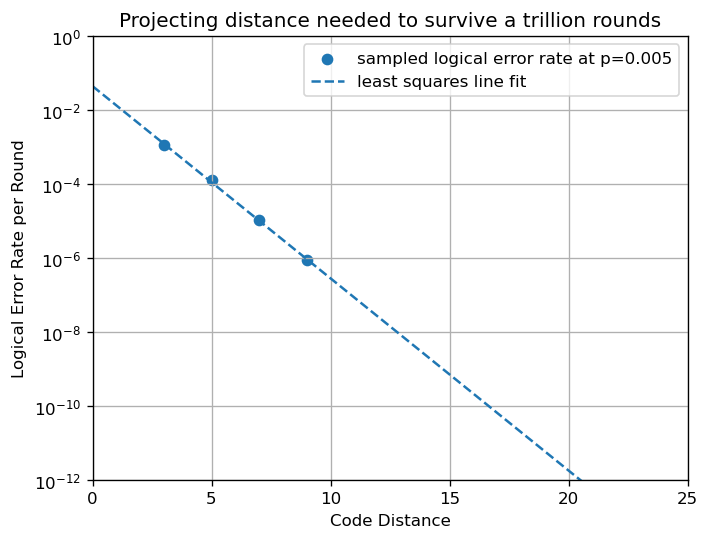

In [19]:
fig, ax = plt.subplots(1, 1)
ax.scatter(xs, ys, label=f"sampled logical error rate at p={p}")
ax.plot([0, 25],
        [np.exp(fit.intercept), np.exp(fit.intercept + fit.slope * 25)],
        linestyle='--',
        label='least squares line fit')
ax.set_ylim(1e-12, 1e-0)
ax.set_xlim(0, 25)
ax.semilogy()
ax.set_title("Projecting distance needed to survive a trillion rounds")
ax.set_xlabel("Code Distance")
ax.set_ylabel("Logical Error Rate per Round")
ax.grid(which='major')
ax.grid(which='minor')
ax.legend()
fig.set_dpi(120)  # Show it bigger

If your circuit implementation is correct, the code should have produced a graph similar to the reference one, with some random variance from simulation. If it did, you're done with Part 8.


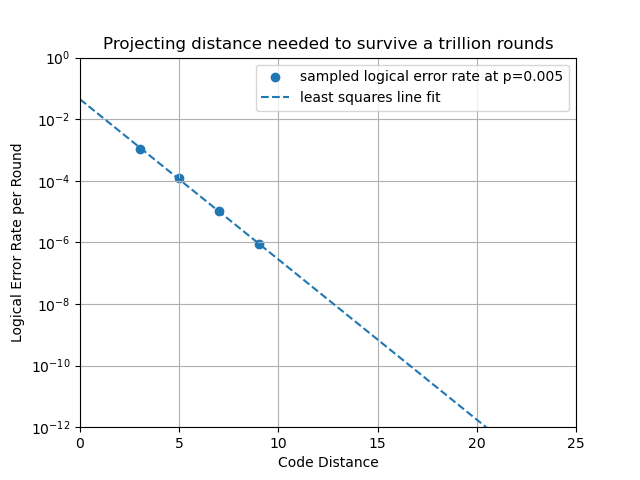
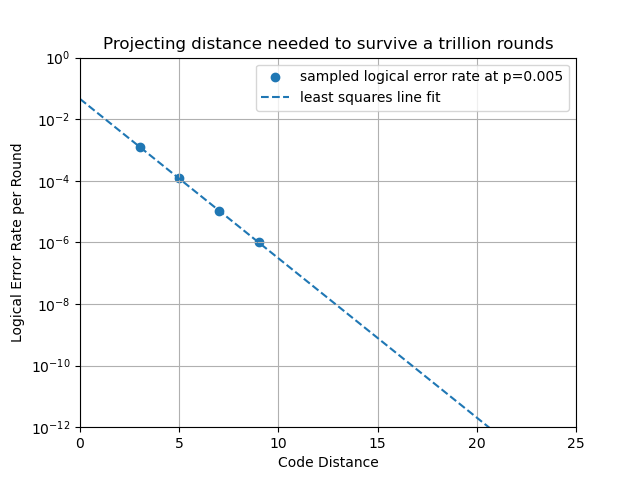

In [20]:
compare_repcode_plot3(fig)

## Part 9 and 10: Follow-up questions.

Question 9 in the "Introduction to Stim" assignment, will ask you what minimum odd-distance repetition code would be required to reach a _logical_ error rate of `10e-12`, with a _physical_ error rate of `6e-3`. Use the Part 8 code to determine this, and submit your answer in the assignment. 

Question 10 will ask you about the relative number of qubits required to increase the power-of error suppression factor from 10 to 100. 

## Review

This is the end of the Lab, great job for making it this far! To recap what you've learned: 
1. You've built a repetition code with the Stim library. 
2. You've simulated your repetition code many times, for different distances, numbers of rounds, and physical error rates. 
3. You've computed the logical error rate from the results of the simulations, with and without `sinter`'s utilities, to identify the physical error rate under which power-of-ten error suppression occurs for a given code and noise model.
4. You've extrapolated beyond a simulatable number of qubits, to estimate the code distance required to reach a desired logical error rate. 

Be sure to return to the "Introduction to Stim" assignment and make sure you mark that you've completed the questions of this Lab and the follow up questions. Next, check out the "Surface Code in Stim" lab, which will repeat what we've done here with the surface code. 